<a href="https://colab.research.google.com/github/pradhap1125/Computer_Vision_Home_Work/blob/main/Computer_Vision_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import scipy.io
from scipy.ndimage import convolve1d, gaussian_filter1d, label, generate_binary_structure

Low value of sigma produces low blur which detects fine edges with more noise and high value produces high blur which reduces noise but blurs out some edges.

Size is the length of the filter and as a general rule, **size≈6⋅σ+1**. Example: 9 for 1.4 sigma.

I have not used ***cv2.filter2D()*** library because it is a standard 2D gaussian blurring. ***scipy.ndimage.gaussian_filter1d(image, sigma, axis)*** applies 1D gaussian smoothing along each axis because of the separable Gaussian property G(x,y)=G
x
​
 (x)⋅G
y
​
 (y).  It is faster than full 2D convolution used by cv2 package.

 High and low threshold are used to control which gradients are considered as true edges. Anything stronger than high threshold is considered as strong edge and below low threshold is considered weak edge.

In [2]:
# Derivative of Gaussian kernel
def gaussian_derivative_kernel(size, sigma):
    x = np.arange(-size // 2 + 1, size // 2 + 1)
    kernel = -x * np.exp(-x**2 / (2 * sigma**2))
    kernel /= np.sum(np.abs(kernel))
    return kernel

#Quantizing Gradient Orientation
#reduce the continuous angle values (0–180°) to just four directions, which is needed for non-maximum suppression.
def quantize_angle(theta):
    q_theta = np.zeros_like(theta)
    q_theta[(theta <= 22.5) | (theta > 157.5)] = 0
    q_theta[(theta > 22.5) & (theta <= 67.5)] = 45
    q_theta[(theta > 67.5) & (theta <= 112.5)] = 90
    q_theta[(theta > 112.5) & (theta <= 157.5)] = 135
    return q_theta

# Step 4: Non-maximum suppression
def non_maximum_suppression(mag, angle):
    suppressed = np.zeros_like(mag)
    rows, cols = mag.shape
    for i in range(1, rows-1):
        for j in range(1, cols-1):
            q = r = 0
            dir = angle[i, j]

            if dir == 0:
                q = mag[i, j+1]
                r = mag[i, j-1]
            elif dir == 45:
                q = mag[i-1, j+1]
                r = mag[i+1, j-1]
            elif dir == 90:
                q = mag[i-1, j]
                r = mag[i+1, j]
            elif dir == 135:
                q = mag[i-1, j-1]
                r = mag[i+1, j+1]

            if mag[i, j] >= q and mag[i, j] >= r:
                suppressed[i, j] = mag[i, j]
            else:
                suppressed[i, j] = 0
    return suppressed

# Step 5: Hysteresis thresholding
def hysteresis_thresholding(nms_img, low_thresh, high_thresh):
    strong = nms_img >= high_thresh
    weak = (nms_img >= low_thresh) & (nms_img < high_thresh)

    structure = generate_binary_structure(2, 2)
    labels, num_labels = label(weak, structure=structure)

    output = np.zeros_like(nms_img, dtype=np.uint8)
    for i in range(1, num_labels + 1):
        coords = np.where(labels == i)
        if np.any(strong[coords]):
            output[coords] = 255
    output[strong] = 255
    return output

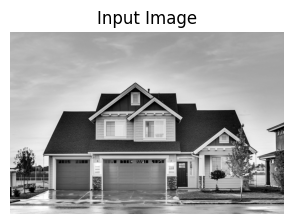

Result for : sigma : 0.5, low-threshold: 20, high-threshold: 40


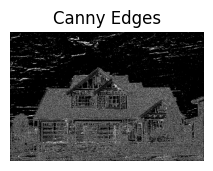

Result for : sigma : 0.5, low-threshold: 20, high-threshold: 80


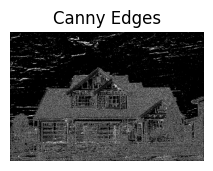

Result for : sigma : 0.5, low-threshold: 30, high-threshold: 60


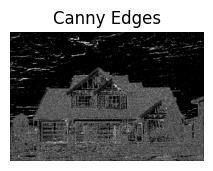

Result for : sigma : 0.5, low-threshold: 10, high-threshold: 100


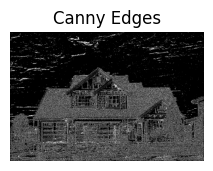

Result for : sigma : 0.5, low-threshold: 50, high-threshold: 100


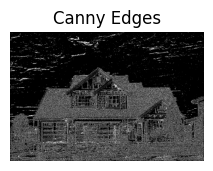

Result for : sigma : 1.0, low-threshold: 20, high-threshold: 40


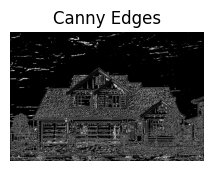

Result for : sigma : 1.0, low-threshold: 20, high-threshold: 80


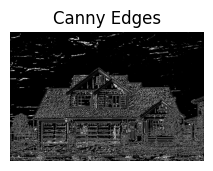

Result for : sigma : 1.0, low-threshold: 30, high-threshold: 60


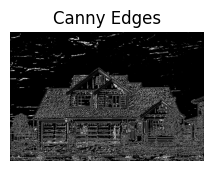

Result for : sigma : 1.0, low-threshold: 10, high-threshold: 100


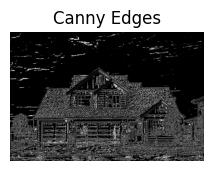

Result for : sigma : 1.0, low-threshold: 50, high-threshold: 100


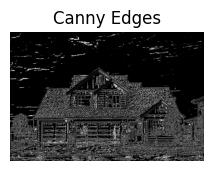

Result for : sigma : 1.4, low-threshold: 20, high-threshold: 40


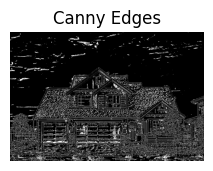

Result for : sigma : 1.4, low-threshold: 20, high-threshold: 80


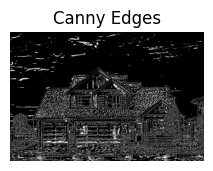

Result for : sigma : 1.4, low-threshold: 30, high-threshold: 60


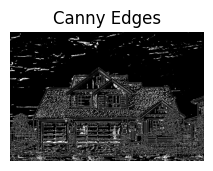

Result for : sigma : 1.4, low-threshold: 10, high-threshold: 100


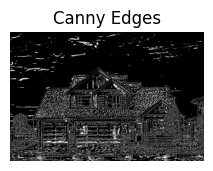

Result for : sigma : 1.4, low-threshold: 50, high-threshold: 100


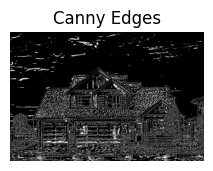

Result for : sigma : 2.0, low-threshold: 20, high-threshold: 40


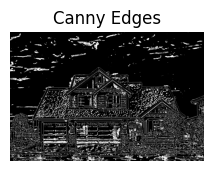

Result for : sigma : 2.0, low-threshold: 20, high-threshold: 80


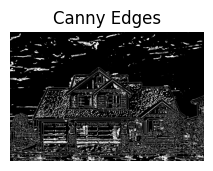

Result for : sigma : 2.0, low-threshold: 30, high-threshold: 60


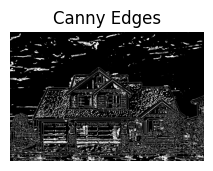

Result for : sigma : 2.0, low-threshold: 10, high-threshold: 100


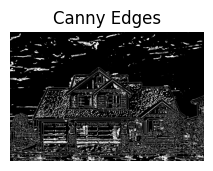

Result for : sigma : 2.0, low-threshold: 50, high-threshold: 100


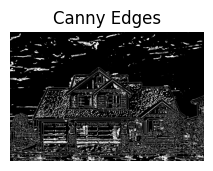

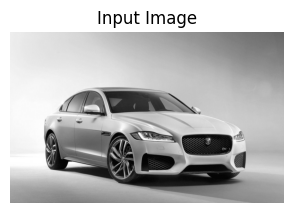

Result for : sigma : 0.5, low-threshold: 20, high-threshold: 40


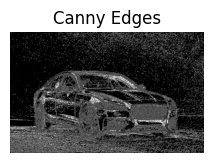

Result for : sigma : 0.5, low-threshold: 20, high-threshold: 80


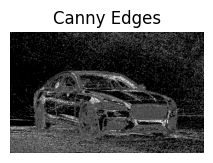

Result for : sigma : 0.5, low-threshold: 30, high-threshold: 60


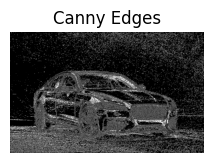

Result for : sigma : 0.5, low-threshold: 10, high-threshold: 100


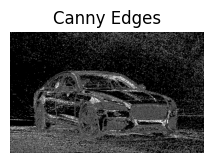

Result for : sigma : 0.5, low-threshold: 50, high-threshold: 100


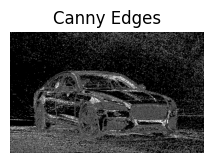

Result for : sigma : 1.0, low-threshold: 20, high-threshold: 40


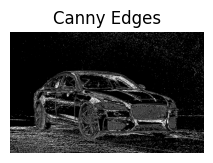

Result for : sigma : 1.0, low-threshold: 20, high-threshold: 80


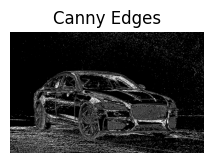

Result for : sigma : 1.0, low-threshold: 30, high-threshold: 60


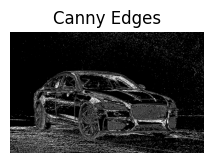

Result for : sigma : 1.0, low-threshold: 10, high-threshold: 100


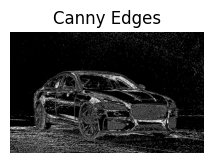

Result for : sigma : 1.0, low-threshold: 50, high-threshold: 100


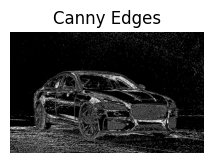

Result for : sigma : 1.4, low-threshold: 20, high-threshold: 40


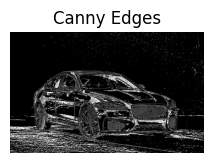

Result for : sigma : 1.4, low-threshold: 20, high-threshold: 80


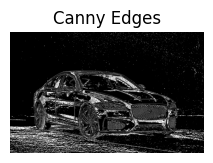

Result for : sigma : 1.4, low-threshold: 30, high-threshold: 60


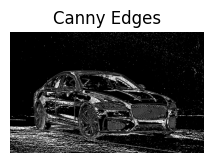

Result for : sigma : 1.4, low-threshold: 10, high-threshold: 100


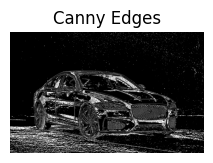

Result for : sigma : 1.4, low-threshold: 50, high-threshold: 100


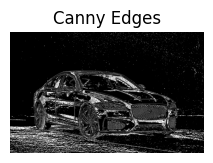

Result for : sigma : 2.0, low-threshold: 20, high-threshold: 40


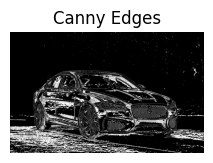

Result for : sigma : 2.0, low-threshold: 20, high-threshold: 80


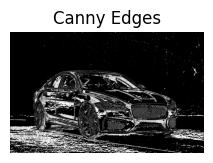

Result for : sigma : 2.0, low-threshold: 30, high-threshold: 60


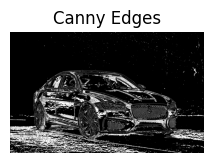

Result for : sigma : 2.0, low-threshold: 10, high-threshold: 100


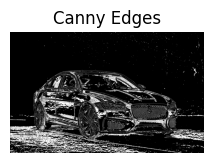

Result for : sigma : 2.0, low-threshold: 50, high-threshold: 100


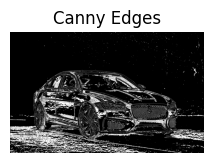

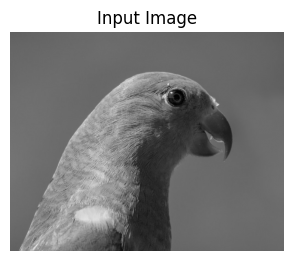

Result for : sigma : 0.5, low-threshold: 20, high-threshold: 40


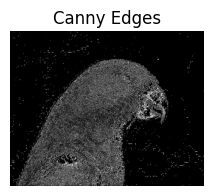

Result for : sigma : 0.5, low-threshold: 20, high-threshold: 80


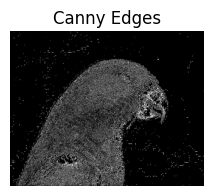

Result for : sigma : 0.5, low-threshold: 30, high-threshold: 60


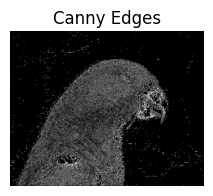

Result for : sigma : 0.5, low-threshold: 10, high-threshold: 100


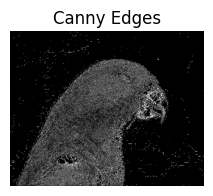

Result for : sigma : 0.5, low-threshold: 50, high-threshold: 100


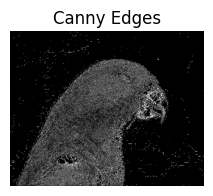

Result for : sigma : 1.0, low-threshold: 20, high-threshold: 40


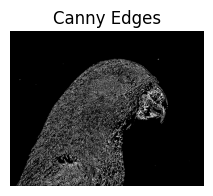

Result for : sigma : 1.0, low-threshold: 20, high-threshold: 80


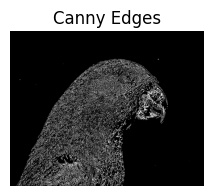

Result for : sigma : 1.0, low-threshold: 30, high-threshold: 60


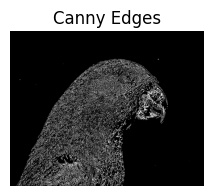

Result for : sigma : 1.0, low-threshold: 10, high-threshold: 100


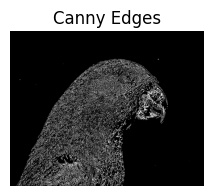

Result for : sigma : 1.0, low-threshold: 50, high-threshold: 100


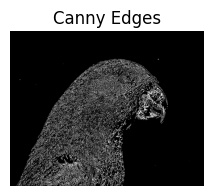

Result for : sigma : 1.4, low-threshold: 20, high-threshold: 40


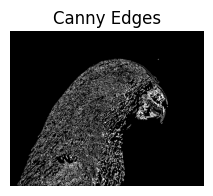

Result for : sigma : 1.4, low-threshold: 20, high-threshold: 80


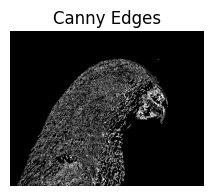

Result for : sigma : 1.4, low-threshold: 30, high-threshold: 60


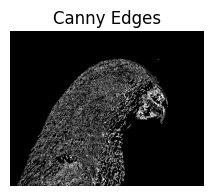

Result for : sigma : 1.4, low-threshold: 10, high-threshold: 100


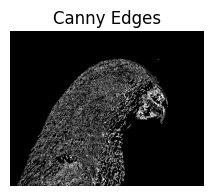

Result for : sigma : 1.4, low-threshold: 50, high-threshold: 100


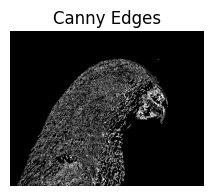

Result for : sigma : 2.0, low-threshold: 20, high-threshold: 40


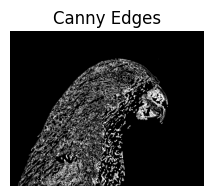

Result for : sigma : 2.0, low-threshold: 20, high-threshold: 80


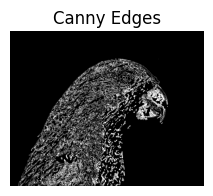

Result for : sigma : 2.0, low-threshold: 30, high-threshold: 60


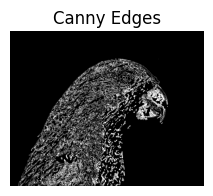

Result for : sigma : 2.0, low-threshold: 10, high-threshold: 100


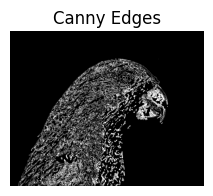

Result for : sigma : 2.0, low-threshold: 50, high-threshold: 100


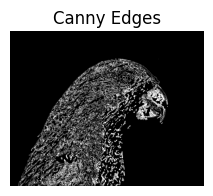

In [3]:
images_path=['/content/CV_HW2/house.jpg','/content/CV_HW2/car.jpg','/content/CV_HW2/bird.jpg']
#Parameters for Gaussian smoothing and derivative of gaussian
sigma_values = [0.5,1.0, 1.4, 2.0]
threshold_pairs = [(20, 40),(20,80),(30, 60),(10,100), (50, 100)]


for path in images_path:
  # Load grayscale image
  image = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
  #original image:
  plt.figure(figsize=(12, 4))
  plt.subplot(1, 3, 1)
  plt.title("Input Image")
  plt.imshow(image, cmap='gray')
  plt.axis('off')
  plt.show()
  for sigma in sigma_values:
      size = int(6 * sigma) | 1
      # Step 1: Gaussian smoothing
      smoothed = gaussian_filter1d(image, sigma=sigma, axis=0)
      smoothed = gaussian_filter1d(smoothed, sigma=sigma, axis=1)

      # Step 2: Gradient using derivative of Gaussian
      Gx_deriv = gaussian_derivative_kernel(size, sigma)
      #derivative (gradient) of the image in the x-direction and y-direction
      Ix = convolve1d(smoothed, Gx_deriv, axis=1)
      Iy = convolve1d(smoothed, Gx_deriv, axis=0)

      # Step 3: Gradient magnitude and orientation
      magnitude = np.hypot(Ix, Iy)
      #calculates the edge direction (angle) at each pixel
      #converts from radians to degrees
      #% 180: maps angles to the range [0, 180)
      theta = np.rad2deg(np.arctan2(Iy, Ix)) % 180
      q_theta = quantize_angle(theta)
      nms_result = non_maximum_suppression(magnitude, q_theta)

      for low_thresh,high_thresh in threshold_pairs:

        final_edges = hysteresis_thresholding(nms_result, low_thresh, high_thresh)
        print(f"Result for : sigma : {sigma}, low-threshold: {low_thresh}, high-threshold: {high_thresh}")
        # Display results
        # plt.subplot(1, 3, 2)
        # plt.title("Non-Max Suppression")
        # plt.imshow(nms_result, cmap='gray')
        # plt.axis('off')
        # plt.subplots_adjust(wspace=0.4)

        plt.subplot(1, 3, 3)
        plt.title(f"Canny Edges")
        plt.imshow(final_edges, cmap='gray')
        plt.axis('off')
        plt.subplots_adjust(wspace=0.4)

        plt.tight_layout()
        plt.show()

I have generated the canny edges for different images using combinations of different values for sigma and high, low threshould. Since the images I have used is of low size (high resolution images takes too much time to compute), I can notice lower sigma values produce better edges since it identifies fine edges. But this does not mean that low sigma is better suited for canny edge detection. As per my understanding, if I use an image of high resolution, it will impact the sigma values.

As per the theorey, low and high threshold should be choosen in such a way, if high threshold is too high, it misses out some edges. If low threshold is too low, more noises gets added. With the low resolution images, I'm unable to differentiate the effect of thresholds.

In order to identify the best canny edge detection parameters, I repeated the same process, except this time I used an image from BSDS500 dataset. This dataset contains various images along with its ground truth object which is nothing but its edges.

I applied canny edge detection process on this image and compared the result with the ground truth object and calculated the F1Score. The combinations of sigma and threshould with has better F1Score can be considered best combinations for canny edge detection.

In [4]:
# ---- Evaluation ----
def compute_metrics(pred, truth):
    pred = (pred > 0)
    truth = (truth > 0)
    tp = np.sum(pred & truth)
    fp = np.sum(pred & ~truth)
    fn = np.sum(~pred & truth)
    precision = tp / (tp + fp + 1e-6)
    recall = tp / (tp + fn + 1e-6)
    f1 = 2 * precision * recall / (precision + recall + 1e-6)
    return precision, recall, f1



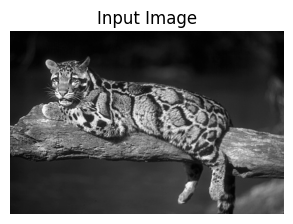

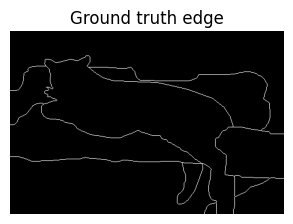

Result for : sigma : 0.5, low-threshold: 20, high-threshold: 40


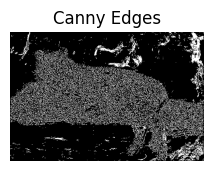

[σ=0.5, low=20, high=40] → F1: 0.0327, P: 0.0178, R: 0.2035
Result for : sigma : 0.5, low-threshold: 20, high-threshold: 80


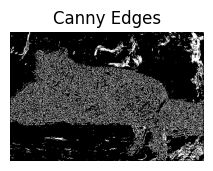

[σ=0.5, low=20, high=80] → F1: 0.0330, P: 0.0180, R: 0.2022
Result for : sigma : 0.5, low-threshold: 30, high-threshold: 60


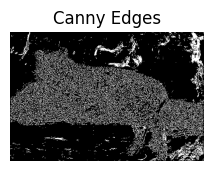

[σ=0.5, low=30, high=60] → F1: 0.0329, P: 0.0179, R: 0.2022
Result for : sigma : 0.5, low-threshold: 10, high-threshold: 100


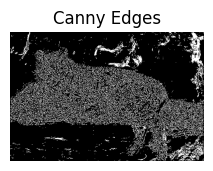

[σ=0.5, low=10, high=100] → F1: 0.0331, P: 0.0180, R: 0.2022
Result for : sigma : 0.5, low-threshold: 50, high-threshold: 100


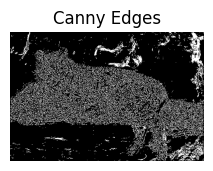

[σ=0.5, low=50, high=100] → F1: 0.0331, P: 0.0180, R: 0.2022
Result for : sigma : 1.0, low-threshold: 20, high-threshold: 40


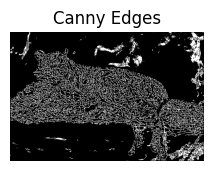

[σ=1.0, low=20, high=40] → F1: 0.0321, P: 0.0177, R: 0.1723
Result for : sigma : 1.0, low-threshold: 20, high-threshold: 80


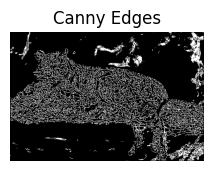

[σ=1.0, low=20, high=80] → F1: 0.0323, P: 0.0178, R: 0.1715
Result for : sigma : 1.0, low-threshold: 30, high-threshold: 60


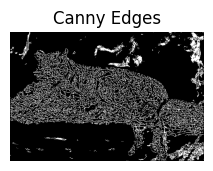

[σ=1.0, low=30, high=60] → F1: 0.0323, P: 0.0178, R: 0.1715
Result for : sigma : 1.0, low-threshold: 10, high-threshold: 100


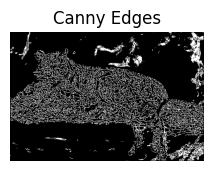

[σ=1.0, low=10, high=100] → F1: 0.0323, P: 0.0178, R: 0.1715
Result for : sigma : 1.0, low-threshold: 50, high-threshold: 100


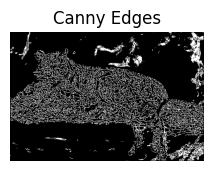

[σ=1.0, low=50, high=100] → F1: 0.0323, P: 0.0178, R: 0.1715
Result for : sigma : 1.4, low-threshold: 20, high-threshold: 40


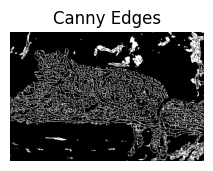

[σ=1.4, low=20, high=40] → F1: 0.0319, P: 0.0177, R: 0.1673
Result for : sigma : 1.4, low-threshold: 20, high-threshold: 80


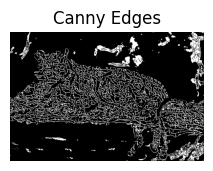

[σ=1.4, low=20, high=80] → F1: 0.0321, P: 0.0178, R: 0.1669
Result for : sigma : 1.4, low-threshold: 30, high-threshold: 60


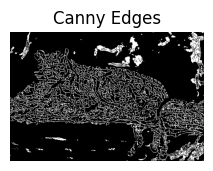

[σ=1.4, low=30, high=60] → F1: 0.0321, P: 0.0178, R: 0.1669
Result for : sigma : 1.4, low-threshold: 10, high-threshold: 100


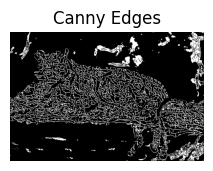

[σ=1.4, low=10, high=100] → F1: 0.0321, P: 0.0178, R: 0.1669
Result for : sigma : 1.4, low-threshold: 50, high-threshold: 100


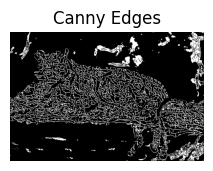

[σ=1.4, low=50, high=100] → F1: 0.0321, P: 0.0178, R: 0.1669
Result for : sigma : 2.0, low-threshold: 20, high-threshold: 40


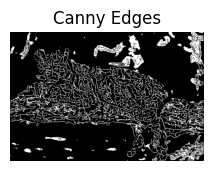

[σ=2.0, low=20, high=40] → F1: 0.0322, P: 0.0178, R: 0.1727
Result for : sigma : 2.0, low-threshold: 20, high-threshold: 80


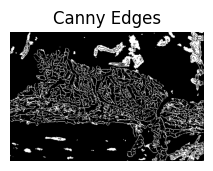

[σ=2.0, low=20, high=80] → F1: 0.0321, P: 0.0177, R: 0.1715
Result for : sigma : 2.0, low-threshold: 30, high-threshold: 60


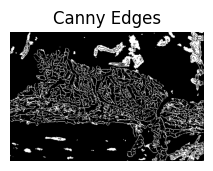

[σ=2.0, low=30, high=60] → F1: 0.0321, P: 0.0177, R: 0.1715
Result for : sigma : 2.0, low-threshold: 10, high-threshold: 100


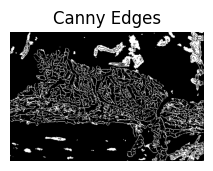

[σ=2.0, low=10, high=100] → F1: 0.0321, P: 0.0177, R: 0.1715
Result for : sigma : 2.0, low-threshold: 50, high-threshold: 100


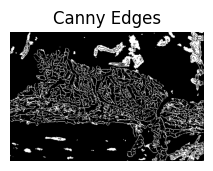

[σ=2.0, low=50, high=100] → F1: 0.0321, P: 0.0177, R: 0.1715

 Best Parameters:
Sigma: 0.5, Low: 10, High: 100
F1: 0.0331, Precision: 0.0180, Recall: 0.2022


In [6]:
images_path=['/content/CV_HW2/160068.jpg']
ground_truths_path=['/content/CV_HW2/160068.mat']
#Parameters for Gaussian smoothing and derivative of gaussian
sigma_values = [0.5,1.0, 1.4, 2.0]
threshold_pairs = [(20, 40),(20,80),(30, 60),(10,100), (50, 100)]

results = []
for path,gt_path in zip(images_path,ground_truths_path):
  # Load grayscale image
  image = cv2.imread(path,cv2.IMREAD_GRAYSCALE)

  mat = scipy.io.loadmat(gt_path)
  ground_truths = mat['groundTruth'][0]
  gt_edge = ground_truths[0]['Boundaries'][0, 0]
  gt_binary = (gt_edge > 0).astype(np.uint8)

  #original image:
  plt.figure(figsize=(12, 4))
  plt.subplot(1, 3, 1)
  plt.title("Input Image")
  plt.imshow(image, cmap='gray')
  plt.axis('off')
  plt.show()
  plt.figure(figsize=(12, 4))
  plt.subplot(1, 3, 1)
  plt.title("Ground truth edge")
  plt.imshow(gt_edge, cmap='gray')
  plt.axis('off')
  plt.show()
  for sigma in sigma_values:
      size = int(6 * sigma) | 1
      # Step 1: Gaussian smoothing
      smoothed = gaussian_filter1d(image, sigma=sigma, axis=0)
      smoothed = gaussian_filter1d(smoothed, sigma=sigma, axis=1)

      # Step 2: Gradient using derivative of Gaussian
      Gx_deriv = gaussian_derivative_kernel(size, sigma)
      #derivative (gradient) of the image in the x-direction and y-direction
      Ix = convolve1d(smoothed, Gx_deriv, axis=1)
      Iy = convolve1d(smoothed, Gx_deriv, axis=0)

      # Step 3: Gradient magnitude and orientation
      magnitude = np.hypot(Ix, Iy)
      #calculates the edge direction (angle) at each pixel
      #converts from radians to degrees
      #% 180: maps angles to the range [0, 180)
      theta = np.rad2deg(np.arctan2(Iy, Ix)) % 180
      q_theta = quantize_angle(theta)
      nms_result = non_maximum_suppression(magnitude, q_theta)

      for low_thresh,high_thresh in threshold_pairs:

        final_edges = hysteresis_thresholding(nms_result, low_thresh, high_thresh)
        print(f"Result for : sigma : {sigma}, low-threshold: {low_thresh}, high-threshold: {high_thresh}")
        # Display results
        # plt.subplot(1, 3, 2)
        # plt.title("Non-Max Suppression")
        # plt.imshow(nms_result, cmap='gray')
        # plt.axis('off')
        # plt.subplots_adjust(wspace=0.4)

        plt.subplot(1, 3, 3)
        plt.title(f"Canny Edges")
        plt.imshow(final_edges, cmap='gray')
        plt.axis('off')
        plt.subplots_adjust(wspace=0.4)

        plt.tight_layout()
        plt.show()

        p, r, f1 = compute_metrics(final_edges, gt_binary)
        results.append(((sigma, low_thresh,high_thresh), f1, p, r))
        print(f"[σ={sigma}, low={low_thresh}, high={high_thresh}] → F1: {f1:.4f}, P: {p:.4f}, R: {r:.4f}")

# ---- Best Result ----
best = max(results, key=lambda x: x[1])
print("\n Best Parameters:")
print(f"Sigma: {best[0][0]}, Low: {best[0][1]}, High: {best[0][2]}")
print(f"F1: {best[1]:.4f}, Precision: {best[2]:.4f}, Recall: {best[3]:.4f}")


Please note that the above best results printed are tested with one image. In real life applications, this testing will be done on millions of images to calculate the aggregate best values.